<a href="https://colab.research.google.com/github/akash-ranjan8/NLP/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fake News Classifier**

In [30]:
#Importing the Libraries
import pandas as pd
import numpy as np

In [31]:
#Reading the Train set
df=pd.read_csv('train.csv')

In [32]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [33]:
df.shape

(20800, 5)

**<h3> Analysing the Train set**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [35]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [36]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [37]:
#Getting the Independent Features
X=df.drop('label',axis=1)

In [38]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [39]:
Y=df['label']

In [40]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [41]:
df.isna().sum

<bound method DataFrame.sum of           id  title  author   text  label
0      False  False   False  False  False
1      False  False   False  False  False
2      False  False   False  False  False
3      False  False   False  False  False
4      False  False   False  False  False
...      ...    ...     ...    ...    ...
20795  False  False   False  False  False
20796  False  False   False  False  False
20797  False  False   False  False  False
20798  False  False   False  False  False
20799  False  False   False  False  False

[20800 rows x 5 columns]>

In [42]:
df=df.dropna()

In [43]:
df.shape

(18285, 5)

In [44]:
messages=df.copy()

In [45]:
messages.reset_index(inplace=True)

In [46]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


**<h3> Formatting the texts**

In [47]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [48]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [49]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()


In [50]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
y=messages['label']

In [52]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [53]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [54]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**<h4>Code for Confusion Matrix**

In [56]:
import matplotlib.pyplot as plt

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#**Applying ML Models**

**MultinomialNB Algorithm**

In [58]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [60]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy:  90.2 %
Confusion matrix, without normalization


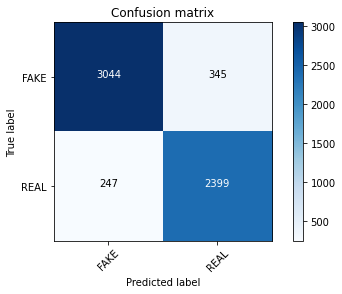

In [78]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
score = '{0:.3g}'.format(score)

print("Accuracy: ", score,"%")
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


**Random Forest Classifier**

In [90]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy:  93.3 %
Confusion matrix, without normalization


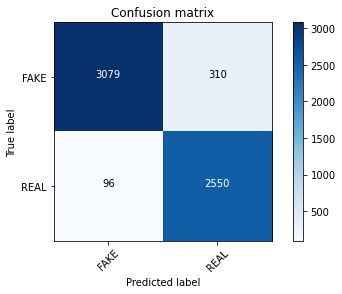

In [91]:
pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
score = '{0:.3g}'.format(score)

print("Accuracy: ", score,"%")
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


**XGBoost Classifier**

In [81]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy:  90.8 %
Confusion matrix, without normalization


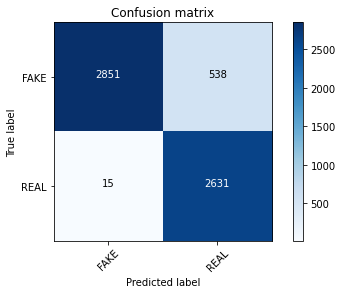

In [82]:
pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
score = '{0:.3g}'.format(score)

print("Accuracy: ", score,"%")
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


**LightGBM Classifier**

In [83]:
import lightgbm as ltb
model = ltb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Accuracy:  92.6 %
Confusion matrix, without normalization


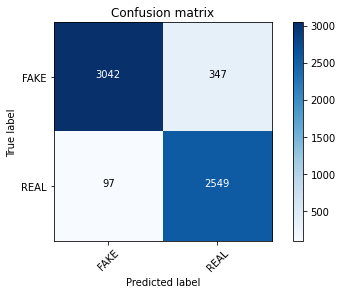

In [84]:
pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
score = '{0:.3g}'.format(score)

print("Accuracy: ", score,"%")
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


**CatBoost Classifier**

In [85]:
!pip install catboost

     |████████████████████████████████| 69.2MB 80kB/s 


In [86]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
model.fit(X_train,y_train)

Learning rate set to 0.030031
0:	learn: 0.6462194	total: 85.1ms	remaining: 1m 25s
1:	learn: 0.6042966	total: 111ms	remaining: 55.4s
2:	learn: 0.5647431	total: 137ms	remaining: 45.4s
3:	learn: 0.5298745	total: 161ms	remaining: 40.2s
4:	learn: 0.5011922	total: 187ms	remaining: 37.2s
5:	learn: 0.4744106	total: 214ms	remaining: 35.4s
6:	learn: 0.4511714	total: 240ms	remaining: 34.1s
7:	learn: 0.4304302	total: 272ms	remaining: 33.7s
8:	learn: 0.4135770	total: 300ms	remaining: 33.1s
9:	learn: 0.3987202	total: 326ms	remaining: 32.3s
10:	learn: 0.3847170	total: 352ms	remaining: 31.6s
11:	learn: 0.3730663	total: 377ms	remaining: 31.1s
12:	learn: 0.3618324	total: 403ms	remaining: 30.6s
13:	learn: 0.3523624	total: 429ms	remaining: 30.2s
14:	learn: 0.3424281	total: 456ms	remaining: 30s
15:	learn: 0.3349855	total: 483ms	remaining: 29.7s
16:	learn: 0.3277736	total: 513ms	remaining: 29.7s
17:	learn: 0.3214783	total: 540ms	remaining: 29.4s
18:	learn: 0.3163862	total: 569ms	remaining: 29.4s
19:	learn: 

Accuracy:  92.6 %
Confusion matrix, without normalization


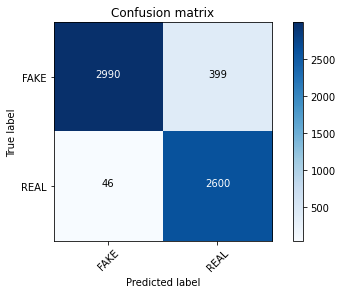

In [87]:
pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
score = '{0:.3g}'.format(score)

print("Accuracy: ", score,"%")
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


**Best Accuracy is in Random Forest Classifier 93.3%**

**<h2>Predicting on test set**

In [95]:
test=pd.read_csv('test.csv')

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [97]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(test)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [99]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
test_set = cv.fit_transform(corpus).toarray()

In [100]:
test_pred=model.predict(test_set)

In [106]:
test_pred

array([1, 1, 1, ..., 1, 1, 1])

**Creating CSV**

In [109]:
akash_submission=pd.DataFrame()

In [110]:
akash_submission['id']=test['id']
akash_submission['label']=test_pred

In [111]:
akash_submission

,id,label
0,20800,1
1,20801,1
2,20802,1
3,20803,1
4,20804,1
...,...,...
5195,25995,1
5196,25996,0
5197,25997,1
5198,25998,1


In [112]:
akash_submission.to_csv('akash_submit.csv')